In [160]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

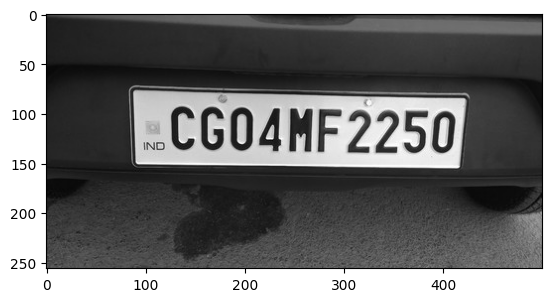

In [161]:
img = cv2.imread("CG.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

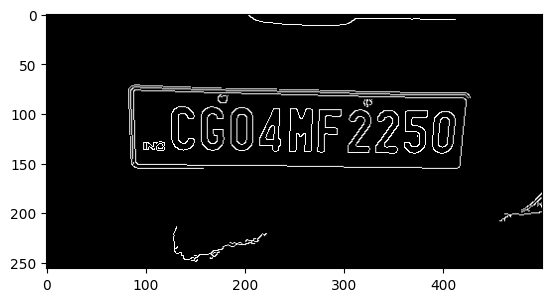

In [162]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  #Noise reduction
edged = cv2.Canny(bfilter,30,200)    # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [163]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [164]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [165]:
location

array([[[ 88,  77]],

       [[ 92, 151]],

       [[417, 152]],

       [[420,  84]]], dtype=int32)

In [166]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

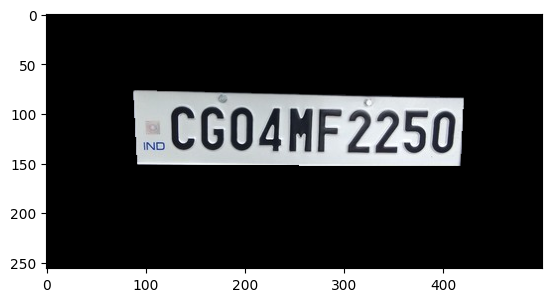

In [167]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [168]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

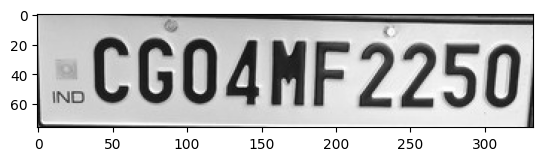

In [169]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [170]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[9, 51], [35, 51], [35, 63], [9, 63]], 'IND', 0.9524475179891551),
 ([[30, 8], [333, 8], [333, 74], [30, 74]], 'CGO4HF2250', 0.49236552234223824)]

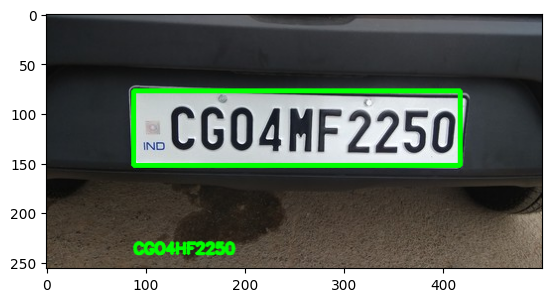

In [171]:
text = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text, org = (approx[0][0][0], approx[1][0][1]+90), fontFace=font, fontScale=0.5, color=(0,255,1),thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))